### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 3

## Exercise 1

In [1]:
PDF_time_to_complete <- function(t){
        ifelse(1<t & t<2,(t-1)*(2-t),0)
}

c <- 1/integrate(PDF_time_to_complete,1,2)$value 
print(paste("c = ", c))

PDF_time_to_complete <- function(t){ 
    ifelse(1<t & t<2,c*(t-1)*(2-t),0)
}

[1] "c =  6"


Four R functions:
1. PDF
2. CFD
3. RANDOM NUMBER GENERATORS
4. QUANTILE 


In [2]:
CDF_time_to_complete <- function(z){
    return(integrate(PDF_time_to_complete,0,z)$value)
}
INVERSE_time_to_complete <- function(y){
    1/2*(3 - 1/(9 + 2*y + 2*sqrt((4 + y)*(5 + y)))**(1/3) - (9 + 2*y + 2*sqrt((4 + y)*(5 + y)))**(1/3))
    }
U <- runif(1e4)
X <- INVERSE_time_to_complete(U)

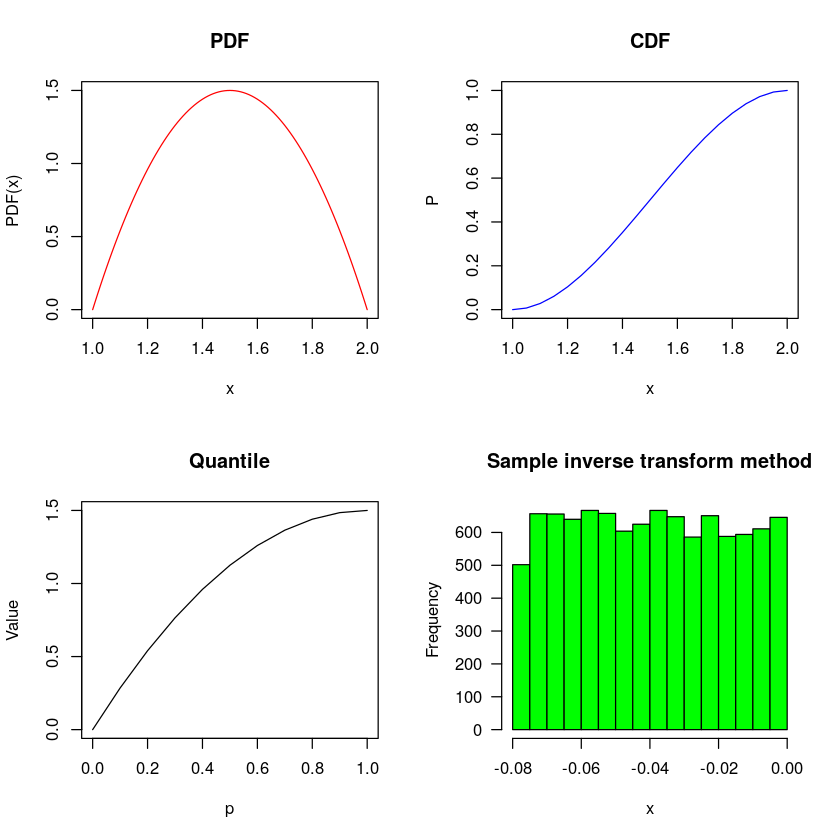

In [3]:
par(mfrow=c(2,2))
x<-seq(1,2,0.05)
curve(PDF_time_to_complete(x),1,2,col='red',main='PDF',ylab='PDF(x)')
CDF_y <- sapply(x,CDF_time_to_complete)
plot(x,CDF_y,main='CDF',type='l',col='blue',ylab='P')
plot(seq(0,1,0.1),quantile(PDF_time_to_complete(x),seq(0,1,0.1),names=FALSE),type='l',main="Quantile",xlab='p',ylab='Value')
h1<-hist(X,main="Sample inverse transform method", xlab="x",col="green",las=1,breaks=15)

\begin{equation*}
-\int_{1}^{2}(t^2-3t+2)=-2t+\frac{3t^2}{2}-\frac{t^{3}}{3}\Big|_1^2 =\frac{1}{6} \longrightarrow \boxed{c=6}
\end{equation*}


In [13]:
cat(paste('Prob t > 75 mins = ', round(1 - CDF_time_to_complete(1.25), digits = 3)),"\n")
cat(paste('Prob 90 mins < t < 120 mins = ', CDF_time_to_complete(2)-CDF_time_to_complete(1.50)))

Prob t > 75 mins =  0.844 
Prob 90 mins < t < 120 mins =  0.5

## Exercise 2

In [23]:
PDF_lifetime<- function(x){ # lifetime in km
    ifelse(1<x & x<2,2/(x**2),0)
}

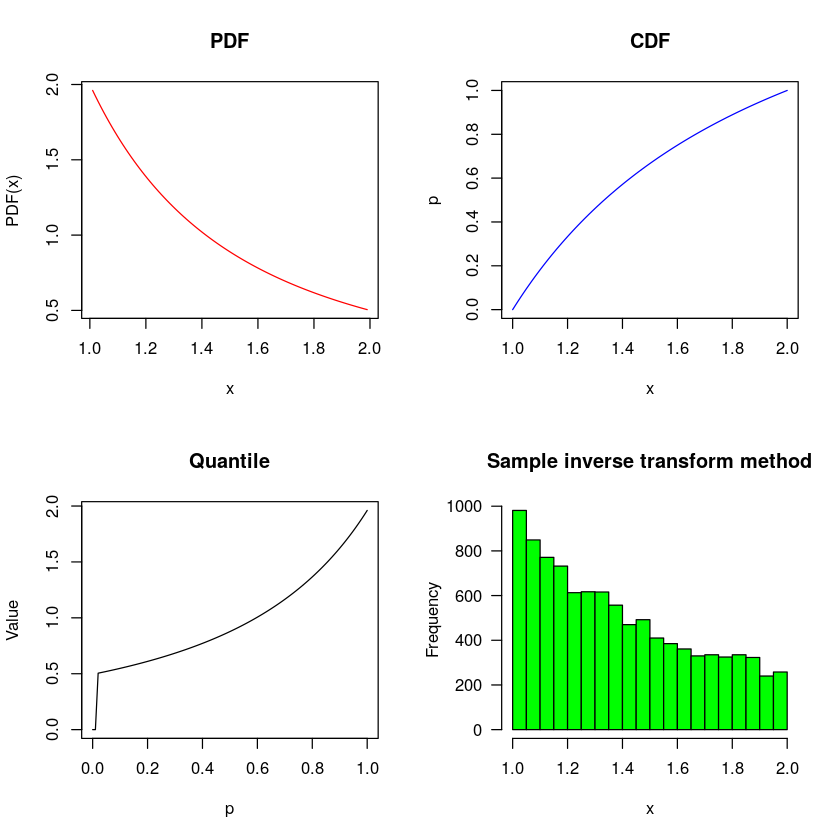

In [24]:
par(mfrow=c(2,2))
x<-seq(1,2,0.01)

# PDF
curve(PDF_lifetime(x),1.01,1.99,col='red',main='PDF',ylab='PDF(x)')
pdf <- PDF_lifetime(x)

# CDF
cdf.lifetime <- function(x){
    return(integrate(PDF_lifetime,0,x)$value)
}
cdf <- sapply(x,cdf.lifetime)
plot(x,cdf,main='CDF',type='l',col='blue',ylab='p')

# Quantile
plot(seq(0,1,0.01),quantile(pdf,seq(0,1,0.01),names=FALSE),type='l',main="Quantile",xlab='p',ylab='Value')

# Inverse Sampling
set.seed(2019)
INVERSE_lifetime <- function(y){
     -(2/(-2 + y)) # inverse of CDF
    }
U1 <- runif(1e4)
X1 <- INVERSE_lifetime(U)
h1<-hist(X1,main="Sample inverse transform method", xlab="x",col="green",las=1,breaks=15)

In [25]:
cat(paste('Tires will last less than 15 000 km: ', cdf.lifetime(1.5)))

Tires will last less than 15 000 km:  0.666666666839979

In [26]:
data <- INVERSE_lifetime(runif(3000))
cat(paste('Mean: ', mean(data) ,"\n"))
cat(paste('Variance: ', mean(data**2)  - mean(data)**2))

Mean:  1.38442092386083 
Variance:  0.0787232297680371

## Exercise 3

In [208]:
install.packages('latex2exp')
library(latex2exp)

Installing package into ‘/home/guida/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


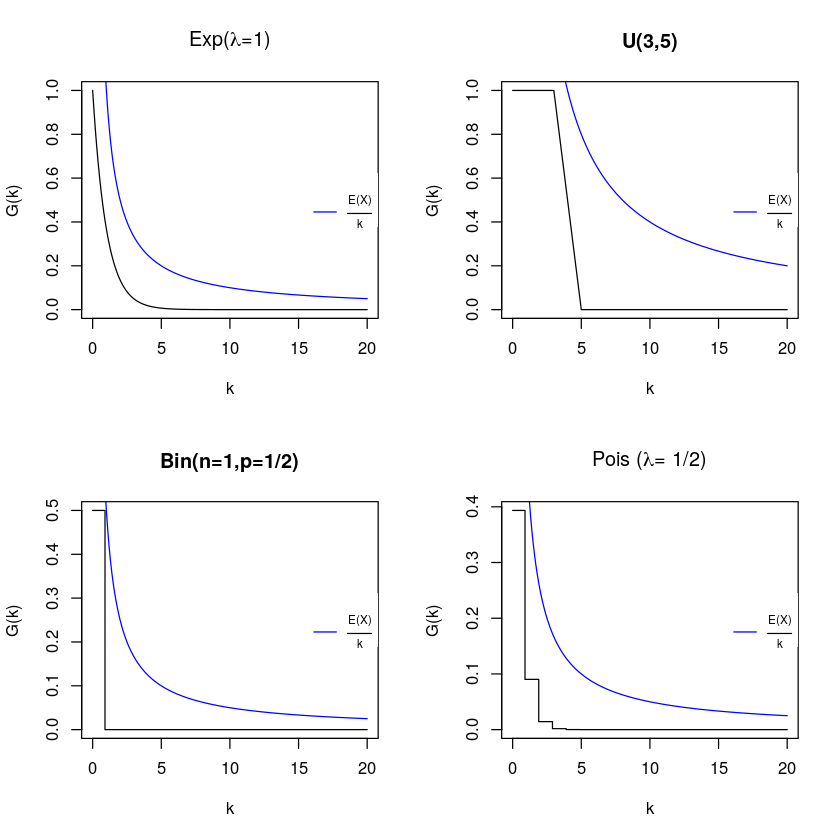

In [295]:
par(mfrow=c(2,2))
k<- seq(0,20,0.1) 
mean0 <- 1
plot(k, 1 - pexp(k, rate = 1),type='l',main=expression(paste("Exp(", lambda, "=1)")),xlab='k',ylab='G(k)')
lines(k,mean0/k,col='blue')
legend("right", legend=c(TeX("$\\frac{E(X)}{k}$")),col=c("blue"), lty=1:2, cex=0.7, box.lty=0)
plot(k,1 - punif(k, min = 3, max = 5),type='l',main="U(3,5)",xlab='k',ylab='G(k)')
lines(k,mean1/k,col='blue')
legend("right", legend=c(TeX("$\\frac{E(X)}{k}$")),col=c("blue"), lty=1:2, cex=0.7, box.lty=0)
mean2 <- 1*0.5
plot(k,1 - pbinom(k, size = 1, prob = 0.5),type='S',main="Bin(n=1,p=1/2)",xlab='k',ylab='G(k)')
lines(k,mean2/k,col='blue')
legend("right", legend=c(TeX("$\\frac{E(X)}{k}$")),col=c("blue"), lty=1:2, cex=0.7, box.lty=0)
mean3 <- 0.5
plot(k,1 - ppois(k, lambda = 0.5),type='S',main=expression(paste("Pois (",lambda,"= 1/2)")),xlab='k',ylab='G(k)')
lines(k,mean3/k,col='blue')
legend("right", legend=c(TeX("$\\frac{E(X)}{k}$")),col=c("blue"), lty=1:2, cex=0.7, box.lty=0)

## Exercise 4

$$P(-k\sigma > X - \mu > +k\sigma) = P(\mu +k\sigma < X < \mu -k\sigma ) = F_X(\mu-k\sigma )-F_X(\mu+k\sigma) $$

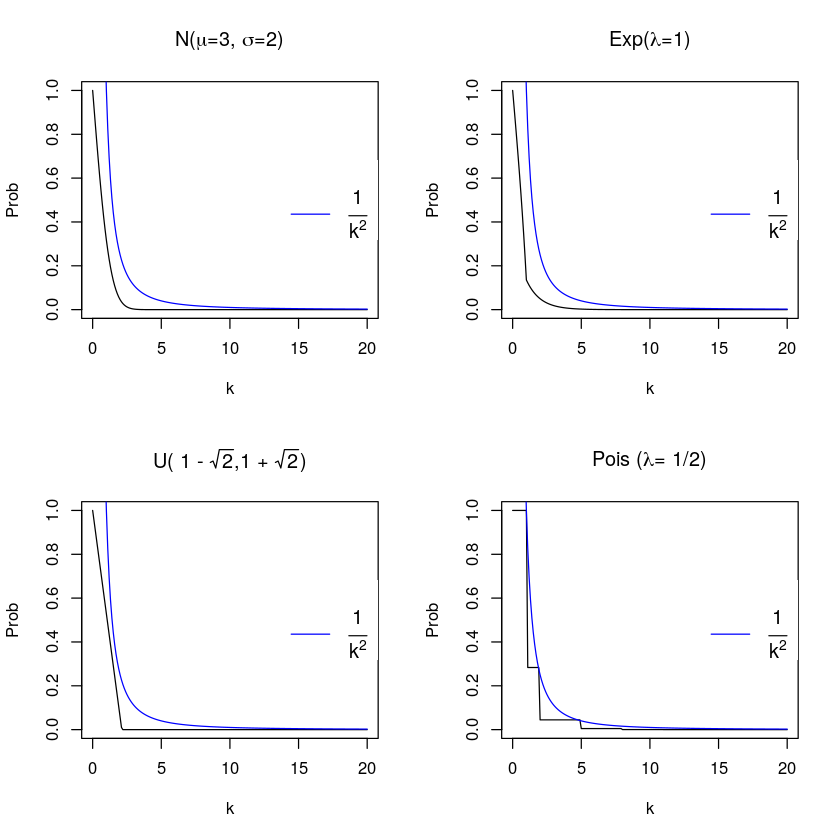

In [296]:
par(mfrow=c(2,2))
mu0    <- 3
sigma0 <- 5
k<- seq(0,20,0.1) 
cdf_minus  <- pnorm(-k*sigma0+mu0,mean = 3, sd = 5)
cdf_plus <- pnorm(+k*sigma0+mu0,mean = 3, sd = 5)
prob  <- 1+cdf_minus-cdf_plus 
plot(k,prob,type='l',main=expression(paste("N(", mu, "=3, ",sigma,"=2)",)),xlab='k',ylab="Prob")
lines(k,1/k**2,col='blue')
legend("right", legend=c(TeX("$\\frac{1}{k^2}$")),col=c("blue"), lty=1:2, cex=1.2, box.lty=0)
mu1    <- 1
sigma1 <- 1
k<- seq(0,20,0.1) 
cdf_minus  <- pexp(-k*sigma1+mu1,rate = 1)
cdf_plus <- pexp(+k*sigma1+mu1,rate = 1)
prob  <- 1+cdf_minus-cdf_plus 
plot(k,prob,type='l',main=expression(paste("Exp(", lambda, "=1)")),xlab='k',ylab="Prob")
lines(k,1/k**2,col='blue')
legend("right", legend=c(TeX("$\\frac{1}{k^2}$")),col=c("blue"), lty=1:2, cex=1.2, box.lty=0)
mu2    <- 0.5*(1 - sqrt(2) + 1 + sqrt(2))
sigma2 <- (2*sqrt(2))**2/12
k<- seq(0,20,0.1) 
cdf_minus  <- punif(-k*sigma2+mu2, min = 1-sqrt(2), max = 1+sqrt(2))
cdf_plus <- punif(k*sigma2+mu2, min = 1-sqrt(2), max = 1+sqrt(2))
prob  <- 1+cdf_minus-cdf_plus
plot(k,prob,type='l',main=expression(paste("U( 1 - ",sqrt(2),",","1 + ",sqrt(2),")")),xlab='k',ylab="Prob")
lines(k,1/k**2,col='blue')
legend("right", legend=c(TeX("$\\frac{1}{k^2}$")),col=c("blue"), lty=1:2, cex=1.2, box.lty=0)
mu3    <- 1/3
sigma3 <- 1/3
k<- seq(0,20,0.1) 
cdf_minus  <- ppois(-k*sigma+mu, lambda = 1/3)
cdf_plus <- ppois(k*sigma+mu, lambda = 1/3)
prob  <- 1+cdf_minus-cdf_plus
plot(k,prob,type='l',main=expression(paste("Pois (",lambda,"= 1/2)")),xlab='k',ylab="Prob")
lines(k,1/k**2,col='blue')
legend("right", legend=c(TeX("$\\frac{1}{k^2}$")),col=c("blue"), lty=1:2, cex=1.2, box.lty=0)